# Airline Sentiment Analysis

**Data Set Information:**

This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

Note: Several of the attributes in the database could be used as a "class" attribute.

**Attribute Information:**

**Attribute: Attribute Range**

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make: alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu, jaguar, mazda, mercedes-benz, mercury,mitsubishi, nissan, peugot, plymouth, porsche,renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400

Analyze how travelers in February 2015 expressed their feelings on Twitter

https://www.kaggle.com/crowdflower/twitter-airline-sentiment


The main aim of this project is to demonstrate the basics of Natural Language Processing(NLP).

We will follow the steps mentioned below:

1. Data Loading
2. Exploratory Data Analysis
3. Data Preprocessing
    - Convert sentence into lower case
    - Remove Stop Words
    - Stemming or Lemmatization
4. Data Preparation
    - Train Test Split
    - Text to numerical vector using Bag of Words
5. Training and Evaluation


## 1. Loading the Data

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
tweet_df= pd.read_csv("data/Tweets.csv")

tweet_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
tweet_df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [5]:
# Since we want to implement sentiment analyser, we will consider only three columns
# 'airline_sentiment', 'airline', 'text'


tweet_df = tweet_df.loc[:, ['airline_sentiment', 'airline', 'text']]

## 2. Exploratory Data Analysis

In [6]:
tweet_df.head()

,airline_sentiment,airline,text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...


In [7]:
tweet_df.shape

(14640, 3)

In [8]:
tweet_df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

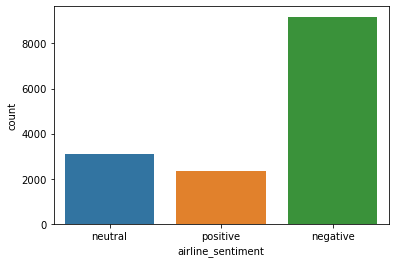

In [9]:
sns.countplot(x='airline_sentiment', data=tweet_df)

In [10]:
tweet_df['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

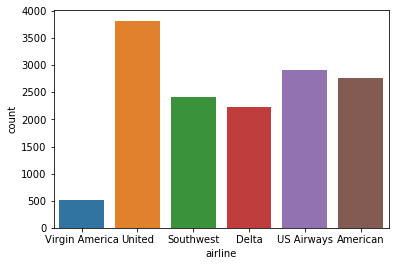

In [11]:
sns.countplot(x='airline', data=tweet_df)

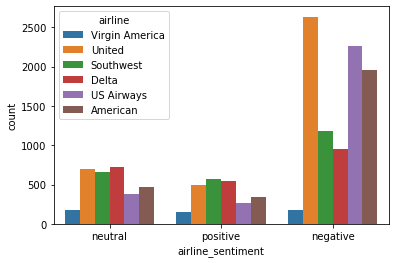

In [12]:
sns.countplot(x='airline_sentiment', hue='airline', data=tweet_df)

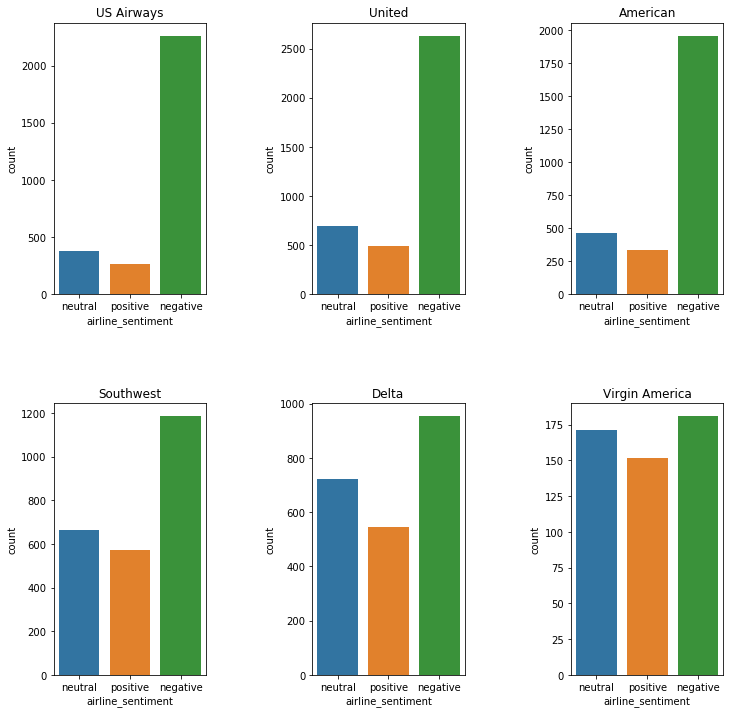

In [13]:
def plot_sub_sentiment(Airline):
    df = tweet_df.loc[tweet_df['airline']==Airline, :]
    sns.countplot(x='airline_sentiment', order=['neutral', 'positive', 'negative'], data=df)
    plt.title(Airline)

plt.figure(1,figsize=(12, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.7)

plt.subplot(231)
plot_sub_sentiment('US Airways')

plt.subplot(232)
plot_sub_sentiment('United')

plt.subplot(233)
plot_sub_sentiment('American')

plt.subplot(234)
plot_sub_sentiment('Southwest')

plt.subplot(235)
plot_sub_sentiment('Delta')

plt.subplot(236)
plot_sub_sentiment('Virgin America')

From the above plots one can find that the distribution of sentiment for the first three airlines are always skewed toward negative. On contrary, the sentiment are distributed more balanced with the later three airline companies. 

#### Word Cloud for the negative Tweets

In [14]:
from wordcloud import WordCloud, STOPWORDS

In [15]:
df = tweet_df.loc[tweet_df['airline_sentiment']=='negative', :]

df.head()

,airline_sentiment,airline,text
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...
5,negative,Virgin America,@VirginAmerica seriously would pay $30 a fligh...
15,negative,Virgin America,@VirginAmerica SFO-PDX schedule is still MIA.
17,negative,Virgin America,@VirginAmerica I flew from NYC to SFO last we...


In [16]:
df['airline_sentiment'].value_counts()

negative    9178
Name: airline_sentiment, dtype: int64

In [18]:
words = ' '.join(df['text'])

print(words[:2000])

@VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse @VirginAmerica and it's a really big bad thing about it @VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.
it's really the only bad thing about flying VA @VirginAmerica SFO-PDX schedule is still MIA. @VirginAmerica  I flew from NYC to SFO last week and couldn't fully sit in my seat due to two large gentleman on either side of me. HELP! @VirginAmerica why are your first fares in May over three times more than other carriers when all seats are available to select??? @VirginAmerica you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet @VirginAmerica status match program.  I applied and it's been three weeks.  Called and emailed with no response. @VirginAmerica What happened 2 ur vegan food options?! At least say on ur site so i know I won't be able 2 eat an

In [19]:
df = tweet_df.loc[tweet_df['airline_sentiment']=='negative', :]

words = ' '.join(df['text'])

cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [20]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

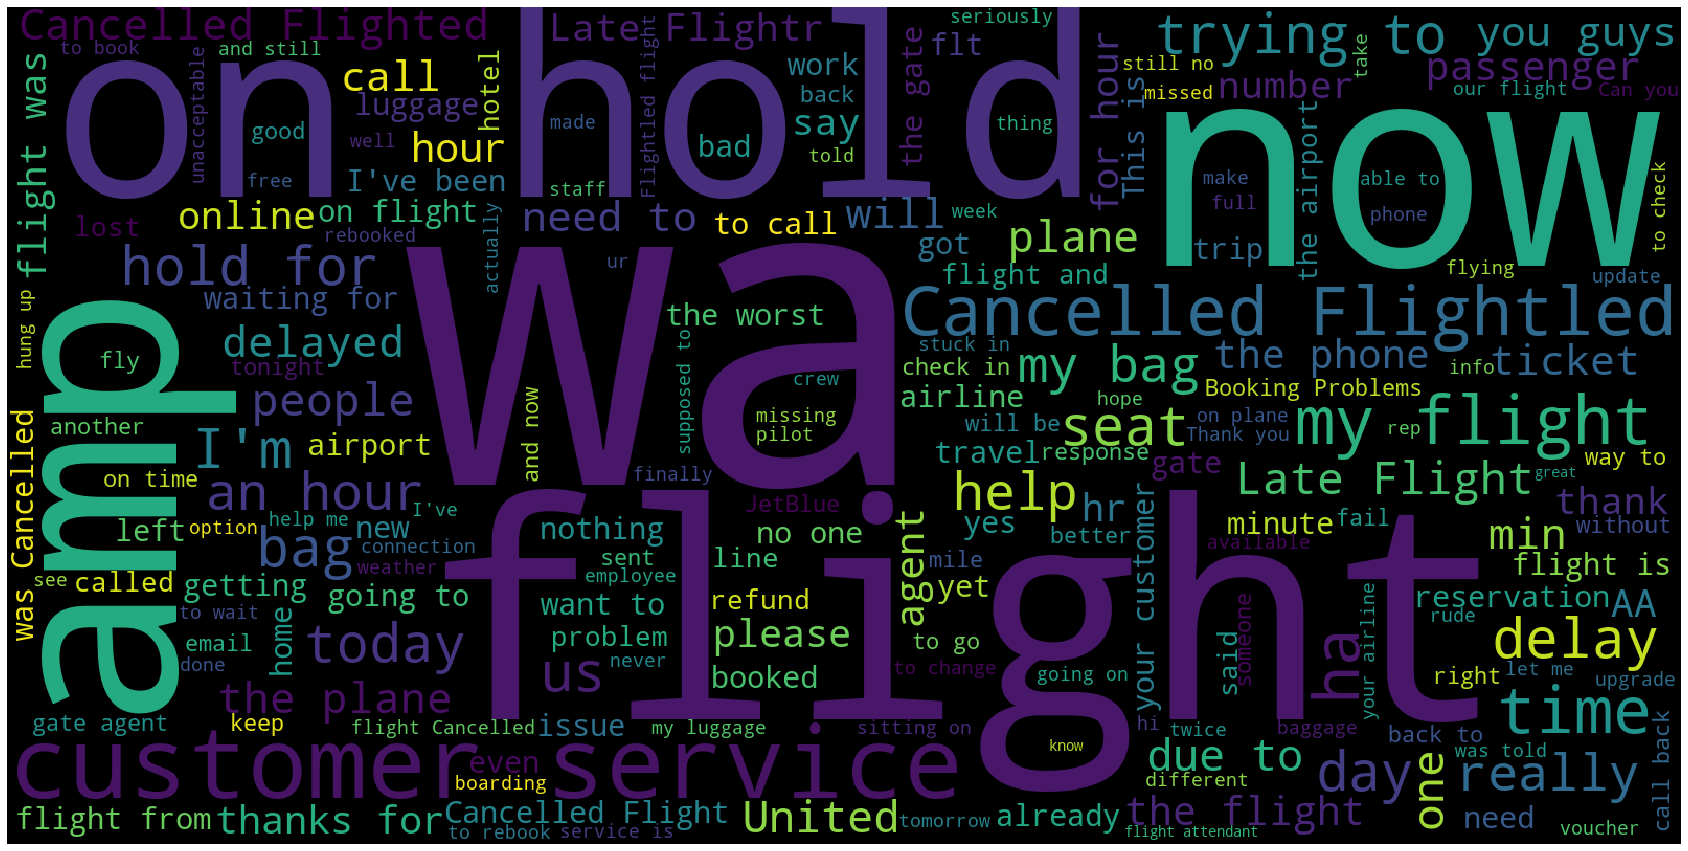

In [21]:
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**We can find that the Tweets with negative sentiment frequently involved some words like cancelled, flight ,customer or hour. People might guess that customer tends to complain when they are waiting for the delayed flights.**

## 3. Data Preprocessing

**Our data exploration ends up at here. The next step will be preprocess the data in order to make the learning process more smooth.**

Preprocessing steps:
- Removing special characters
- Convert sentence into lower case
- Remove Stop Words
- Stemming or Lemmatization
    
 

In [22]:
# import nltk
# nltk.download('stopwords')

In [23]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [24]:
## initialise the inbuilt Stemmer
stemmer = PorterStemmer()

In [25]:
# # We can also use Lemmatizer instead of Stemmer

lemmatizer = WordNetLemmatizer()

In [26]:
# initializing the lists

clean_tweet_lst = []

tweet_len_lst = []

In [27]:
def preprocess(raw_tweet, flag):
    # Removing special characters and digits
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet)
    
    # change sentence to lower case
    letters_only = letters_only.lower()

    # tokenize into words
    words = letters_only.split()
    
    # remove stop words                
    words = [w for w in words if not w in stopwords.words("english")]
    
    #Stemming/Lemmatization
    if(flag == 'stem'):
        words = [stemmer.stem(word) for word in words]
    else:
        words = [lemmatizer.lemmatize(word) for word in words]
    
    clean_tweet_lst.append(" ".join(words))
    
    tweet_len_lst.append(len(words))

Stemming makes sure that different variations of a word, say ‘warm’, warmer’, ‘warming’ and ‘warmed,’ are represented by a single token - ‘warm’, because they all represent the same information (represented by the 'stem' of the word).

In [29]:
%%time

clean_tweet_lst = []

tweet_len_lst = []

tweet_df['text'].apply(lambda x: preprocess(x, 'stem'))

tweet_df['clean_tweet_stem'] = clean_tweet_lst

tweet_df['tweet_length_stem'] = tweet_len_lst

Wall time: 1min 18s


In [30]:
%%time

clean_tweet_lst = []

tweet_len_lst = []

tweet_df['text'].apply(lambda x: preprocess(x, 'lemma'))

tweet_df['clean_tweet_lema'] = clean_tweet_lst

tweet_df['tweet_length_lema'] = tweet_len_lst

Wall time: 1min 19s


In [31]:
tweet_df.head()

,airline_sentiment,airline,text,clean_tweet_stem,tweet_length_stem,clean_tweet_lema,tweet_length_lema
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,virginamerica dhepburn said,3,virginamerica dhepburn said,3
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,virginamerica plu ad commerci experi tacki,6,virginamerica plus added commercial experience...,6
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,virginamerica today must mean need take anoth ...,8,virginamerica today must mean need take anothe...,8
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,virginamerica realli aggress blast obnoxi ente...,11,virginamerica really aggressive blast obnoxiou...,11
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,virginamerica realli big bad thing,5,virginamerica really big bad thing,5


## 4. Data Preparation 

Let's now prepare the data and build the model.

In [32]:
# Preparing the target variable

tweet_df['sentiment']=tweet_df['airline_sentiment'].apply(lambda x: 0 if x=='negative' else 1)

tweet_df.head()

,airline_sentiment,airline,text,clean_tweet_stem,tweet_length_stem,clean_tweet_lema,tweet_length_lema,sentiment
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,virginamerica dhepburn said,3,virginamerica dhepburn said,3,1
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,virginamerica plu ad commerci experi tacki,6,virginamerica plus added commercial experience...,6,1
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,virginamerica today must mean need take anoth ...,8,virginamerica today must mean need take anothe...,8,1
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,virginamerica realli aggress blast obnoxi ente...,11,virginamerica really aggressive blast obnoxiou...,11,0
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,virginamerica realli big bad thing,5,virginamerica really big bad thing,5,0


In [33]:
# splitting into test and train

from sklearn.model_selection  import train_test_split

train, test = train_test_split(tweet_df,test_size=0.2,random_state=42)

In [34]:
train_clean_tweet=[]
for tweet in train['clean_tweet_stem']:
    train_clean_tweet.append(tweet)

test_clean_tweet=[]
for tweet in test['clean_tweet_stem']:
    test_clean_tweet.append(tweet)

**Text to numerical vector using Bag of Words**

BAG OF WORDS:
https://machinelearningmastery.com/gentle-introduction-bag-words-model/

CODE EXAMPLE:
https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = "word")

train_features = vectorizer.fit_transform(train_clean_tweet)

test_features = vectorizer.transform(test_clean_tweet)

In [37]:
vectorizer.vocabulary_

{'unit': 8592,
 'offer': 5776,
 'us': 8697,
 'room': 6986,
 'peopl': 6115,
 'fail': 2686,
 'jetblu': 4217,
 'jfk': 4241,
 'nyc': 5723,
 'staff': 7687,
 'amaz': 259,
 'lax': 4595,
 'send': 7240,
 'email': 2434,
 'detail': 2010,
 'disappoint': 2082,
 'experi': 2643,
 'jetbluecheep': 4222,
 'well': 9019,
 'last': 4571,
 'updat': 8670,
 'right': 6906,
 'direct': 2070,
 'least': 4620,
 'keep': 4399,
 'finger': 2815,
 'cross': 1744,
 'americanair': 269,
 'flight': 2868,
 'still': 7740,
 'sit': 7408,
 'dfw': 2026,
 'wait': 8933,
 'baggag': 610,
 'load': 4762,
 'southwestair': 7592,
 'companion': 1545,
 'pass': 6039,
 'broken': 986,
 'today': 8261,
 'purchas': 6494,
 'error': 2534,
 'invalid': 4055,
 'loyalti': 4841,
 'member': 5097,
 'account': 56,
 'statu': 7717,
 'sw': 7900,
 'vyil': 8922,
 'xklrog': 9287,
 'fs': 3074,
 'push': 6499,
 'hour': 3725,
 'hold': 3652,
 'priceless': 6389,
 'http': 3758,
 'co': 1479,
 'th': 8087,
 'ldi': 4608,
 'tri': 8365,
 'reach': 6664,
 'custom': 1796,
 'servi

In [38]:
print("Total unique words:", len(vectorizer.vocabulary_))

print("Type of train_features:", type(train_features))

print("Shape of input data", train_features.shape)

Total unique words: 9504
Type of train_features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data (11712, 9504)


## 5. Model Building and Evaluation

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [40]:
Classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200)]

In [41]:
%%time

dense_features = train_features.toarray()

dense_test = test_features.toarray()

for classifier in Classifiers:
    fit = classifier.fit(dense_features,train['sentiment'])
    pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['sentiment'])
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))    

Accuracy of LogisticRegression is 0.8288934426229508
Accuracy of DecisionTreeClassifier is 0.7585382513661202
Accuracy of RandomForestClassifier is 0.8159153005464481
Wall time: 6min 21s


## Saving the Model and Encoder in Pickle

In [43]:
model = LogisticRegression()
model.fit(dense_features,train['sentiment'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
from pickle import dump

dump(vectorizer, open('pickle/onehotencoder.pkl', 'wb'))

dump(model, open('pickle/logit_model.pkl', 'wb'))

## Prediction on Future Data Points

In [48]:
from pickle import load

In [46]:
def preprocess(raw_tweet):
    # Removing special characters and digits
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet)
    
    # change sentence to lower case
    letters_only = letters_only.lower()

    # tokenize into words
    words = letters_only.split()
    
    # remove stop words                
    words = [w for w in words if not w in stopwords.words("english")]
    
    # Stemming
    words = [stemmer.stem(word) for word in words]
    
    clean_sent = " ".join(words)
    
    return clean_sent

In [51]:
classifier = load(open('pickle/logit_model.pkl', 'rb'))

onehotencoder = load(open('pickle/onehotencoder.pkl', 'rb'))

In [59]:
tweet = input("Enter a tweet to check its sentiment: ")

clean_tweet = preprocess(tweet)

clean_tweet_encoded = onehotencoder.transform([clean_tweet])

tweet_input = clean_tweet_encoded.toarray()

prediction = classifier.predict(clean_tweet_encoded)

print(prediction)


Enter a tweet to check its sentiment: Love the flight. best airline
[1]


In [57]:
print(type(prediction))

<class 'numpy.ndarray'>


In [60]:
if(prediction==0):
    print("spam")
else:
    print("ham")

ham
